# **First Half:**
* Finished all [Reproducible Data Analysis in Jupyter](https://www.youtube.com/playlist?list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ) youtube videos
* Read [Exploring a Data-set with Simple Pandas and Plot Visualizations Features](https://towardsdatascience.com/exploring-a-data-set-with-simple-pandas-and-plot-visualizations-features-73901ee76c6c)
* Read [Exploratory Data Analysis with Pandas](https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas/notebook)

# **Second Half:**
Data can be tested via "python -m pytest .\artc_package\ ".
[Github](https://github.com/ArtemChteiman/PHYS-2112_Assignment-10)


In [1]:
# Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import artc_package.data as apackage

% matplotlib inline

# 1. Transit Pass-ups Data Analysis
Using data from [Transit Pass-ups](https://data.winnipeg.ca/Transit/Transit-Pass-ups/mer2-irmb)

In [2]:
passups_data = apackage.get_winnipeg_transit_passups_data()
print(passups_data.info())
passups_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pass_up_id         1000 non-null   int64 
 1   pass_up_type       1000 non-null   object
 2   time               1000 non-null   object
 3   route_number       994 non-null    object
 4   route_name         755 non-null    object
 5   route_destination  994 non-null    object
 6   location           1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB
None


,pass_up_id,pass_up_type,time,route_number,route_name,route_destination,location
0,3597678,Full Bus Pass-Up,2023-03-18T19:26:02.000,11,Portage-Kildonan,Via Glenway,POINT (-97.190791319609 49.882048960621)
1,3597661,Full Bus Pass-Up,2023-03-18T19:12:51.000,11,Portage-Kildonan,Via Donwood,POINT (-97.199746273767 49.880443359047)
2,3597657,Full Bus Pass-Up,2023-03-18T19:05:52.000,11,Portage-Kildonan,Via Glenway,POINT (-97.156617606814 49.888958398123)
3,3597574,Full Bus Pass-Up,2023-03-18T16:26:44.000,15,Sargent-Mountain,To Inkster,POINT (-97.134469700837 49.904768122021)
4,3597435,Full Bus Pass-Up,2023-03-18T13:46:32.000,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188)


In [3]:
passups_data.isna().sum()

pass_up_id             0
pass_up_type           0
time                   0
route_number           6
route_name           245
route_destination      6
location               0
dtype: int64

passups_data.dtypes()

Series not callable.

In [4]:
pass_ups_count = passups_data['route_number'].value_counts()

Text(0, 0.5, 'Route')

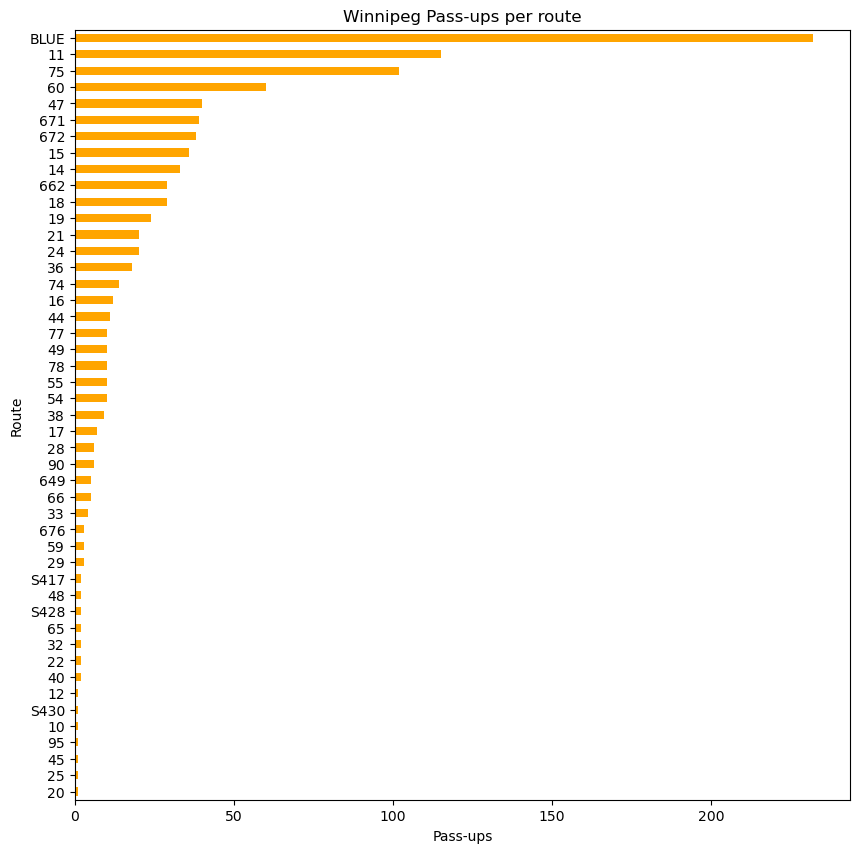

In [5]:
pass_ups_graph = pass_ups_count.sort_values().plot.barh(figsize=(10, 10), color='orange')
pass_ups_graph.set_title('Winnipeg Pass-ups per route')
pass_ups_graph.set_xlabel('Pass-ups')
pass_ups_graph.set_ylabel('Route')

We can see that the BLUE rapid transit line providing frequent, reliable, high-speed service between Downtown, the University of Manitoba and St. Norbert, is has the most pass-ups, but since it is supposed to be frequent, it makes sense that there would be many pass-ups as well to match the demand.

In [6]:
passups_counts = passups_data['route_number'].value_counts()
passups_percentages = (passups_counts / passups_counts.sum() * 100).round(2)
percentages_df = pd.DataFrame(
    {'Route': passups_percentages.index, 'Pass-ups:': passups_counts, 'Percentage': passups_percentages.values})
percentages_df['Percentage'] = percentages_df['Percentage'].astype(str) + '%'
table_string = percentages_df.to_string(index=False)
print(table_string)

Route  Pass-ups: Percentage
 BLUE        232     23.34%
   11        115     11.57%
   75        102     10.26%
   60         60      6.04%
   47         40      4.02%
  671         39      3.92%
  672         38      3.82%
   15         36      3.62%
   14         33      3.32%
  662         29      2.92%
   18         29      2.92%
   19         24      2.41%
   21         20      2.01%
   24         20      2.01%
   36         18      1.81%
   74         14      1.41%
   16         12      1.21%
   44         11      1.11%
   49         10      1.01%
   78         10      1.01%
   55         10      1.01%
   54         10      1.01%
   77         10      1.01%
   38          9      0.91%
   17          7       0.7%
   28          6       0.6%
   90          6       0.6%
  649          5       0.5%
   66          5       0.5%
   33          4       0.4%
   59          3       0.3%
   29          3       0.3%
  676          3       0.3%
   40          2       0.2%
   32          2    

Since we only have data on the number of pass-ups and not the total number of buses for each route, it’s difficult to determine the frequency of pass-ups and compare the performance of different bus lines. However, routes with a pass-up percentage below 2% are likely to be more reliable options for planning a trip. For students who need to arrive on time for class, it’s recommended to take at least 1-2 buses ahead of schedule to account for the possibility of pass-ups.

### Attempted to create a plot.pie
_percentages_df.plot.pie(figsize=(10,10)).set_title('Winnipeg Pass-ups by route')_

_ValueError: pie requires either y column or 'subplots=True'_

_Tried to use plot.pie from an existing DataFrame. Did not work. I figured it would work with just the passups_counts()_

<AxesSubplot:ylabel='route_number'>

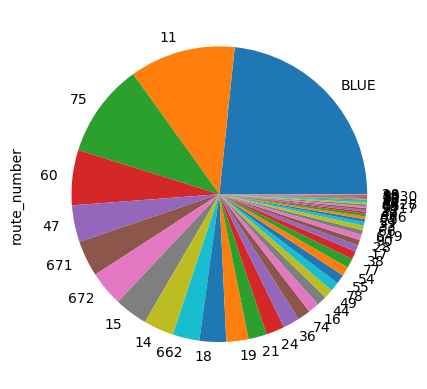

In [7]:
passups_counts.plot.pie()
# As I figured it would work with just the data.

<Figure size 1000x1000 with 0 Axes>

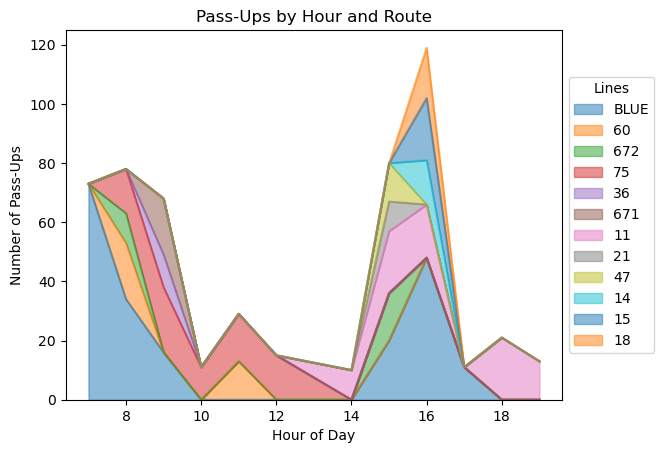

In [8]:
passups_data['time'] = pd.to_datetime(passups_data['time'])
passups_data['hour'] = passups_data['time'].dt.hour
pass_ups_by_hour_route = passups_data.groupby(['hour', 'route_number'])['pass_up_id'].count()
pass_ups_by_hour_route = pass_ups_by_hour_route[pass_ups_by_hour_route >= 10]
pass_ups_by_hour_route = pass_ups_by_hour_route.unstack(level='route_number')

plt.figure(figsize=(10, 10))
pass_ups_by_hour_route.plot(kind='area', alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Lines')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pass-Ups')
plt.title('Pass-Ups by Hour and Route')
plt.show()

Upon exclusion of data points reflecting fewer than 10 pass-ups, it can be observed that the majority of lines and pass-ups occur during two distinct time intervals: from 7AM to 10AM and from 2PM to 5PM. In contrast, pass-ups occurring during the remainder of the day are concentrated on very few lines. Specifically, between the hours of 10AM and 12PM, only a limited number of lines experience pass-ups.

_Had to figure out online how to move properly the legend outside the graph as it was in the middle and blocking all the graph, and I had too many lines in the legend.
Removed lines with less than 10 pass-ups.
Found my answer online at [Put legend outside plot matplotlib](https://pythonguides.com/put-legend-outside-plot-matplotlib/#:~:text=Python%20Matplotlib%20tick_params-,Matplotlib%20set%20legend%20outside%20plot,the%20bbox_to_anchor%20attribute%20to%20it.&text=We%20use%20the%20bbox_to_anchor%3D(,the%20coordinates%20of%20the%20legend.) to move the legend_

# 2. Air Quality Analysis
Using data from [Air Quality](https://data.winnipeg.ca/resource/f58p-2ju3)

In [9]:
airquality_data = apackage.get_winnipeg_air_quality_data()
print(airquality_data.info())
airquality_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observationid     1000 non-null   int64  
 1   observationtime   1000 non-null   object 
 2   thingid           1000 non-null   int64  
 3   locationname      1000 non-null   object 
 4   measurementtype   1000 non-null   object 
 5   measurementvalue  1000 non-null   float64
 6   measurementunit   1000 non-null   object 
 7   location          1000 non-null   object 
 8   point             1000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB
None


,observationid,observationtime,thingid,locationname,measurementtype,measurementvalue,measurementunit,location,point
0,4352708,2021-06-09T23:23:15.000,120,St. James East,PM2.5 Particulates,17.00,ug/m3,"\n, \n(49.879133, -97.205769)",POINT (-97.205769 49.879133)
1,4352709,2021-06-09T23:23:15.000,120,St. James East,Temperature,21.31,C,"\n, \n(49.879133, -97.205769)",POINT (-97.205769 49.879133)
2,4352710,2021-06-09T23:23:15.000,120,St. James East,Humidity,84.32,%,"\n, \n(49.879133, -97.205769)",POINT (-97.205769 49.879133)
3,4352711,2021-06-09T23:25:59.000,3884328,Charleswood,PM2.5 Particulates,18.00,ug/m3,"\n, \n(49.858488, -97.2789063)",POINT (-97.2789063 49.858488)
4,4352712,2021-06-09T23:25:59.000,3884328,Charleswood,Temperature,24.90,C,"\n, \n(49.858488, -97.2789063)",POINT (-97.2789063 49.858488)


I would like to query all the temperatures from the data.

attempted

airquality_data['Temperature'] and figured that's not the way to do it.

Solved below

In [10]:
airquality_data_temperatures = airquality_data[airquality_data['measurementtype'] == 'Temperature']
# Created a seperate DataFrame with temperatures only.

#airquality_data_temperatures['observationtime'] = airquality_data_temperatures['observationtime'].dt.strftime('%Y-%m')
# Tried to change observationtime to year-month to analyze it. Failed. I think I need to query it another way.

#airquality_data_temperatures['observationtime'] = pd.to_datetime(airquality_data_temperatures['observationtime'])
#airquality_data_temperatures['observationtime'] = airquality_data_temperatures['observationtime'].dt.strftime('%Y-%m')
# Got an error 'SettingWithCopyWarning:...'. Had to google what's the issue.

airquality_data_temperatures = airquality_data[
    (airquality_data['measurementtype'] == 'Temperature') & (airquality_data['measurementvalue'] > -99)].copy()
airquality_data_temperatures['observationtime'] = pd.to_datetime(airquality_data_temperatures['observationtime'])
airquality_data_temperatures['observationtime'] = airquality_data_temperatures['observationtime'].dt.strftime('%Y-%m')

#airquality_data_temperatures.loc['locationname']
# Tried to index using 'Exploratory Data Analysis with Pandas' method. Didn't manage to make it work.

airquality_data_temperatures = airquality_data_temperatures.set_index('observationtime')
airquality_data_temperatures = airquality_data_temperatures.drop(['observationid', 'thingid', 'location', 'point'],
                                                                 axis=1)

airquality_data_temperatures

,locationname,measurementtype,measurementvalue,measurementunit
observationtime,,,,
2021-06,St. James East,Temperature,21.31,C
2021-06,Charleswood,Temperature,24.90,C
2021-06,St. James East,Temperature,21.16,C
2021-06,Charleswood,Temperature,24.84,C
2021-06,St. James East,Temperature,21.16,C
...,...,...,...,...
2022-06,Booth,Temperature,28.57,C
2022-06,Booth,Temperature,26.24,C
2022-03,Charleswood,Temperature,-10.57,C


In [11]:
print('Tested locations: ', airquality_data_temperatures['locationname'].unique())
print('Max temperature: \n', airquality_data_temperatures.max())
print('Min temperature: \n', airquality_data_temperatures.min())

Tested locations:  ['St. James East' 'Charleswood' 'Booth' 'Transcona #2']
Max temperature: 
 locationname        Transcona #2
measurementtype      Temperature
measurementvalue           38.16
measurementunit                C
dtype: object
Min temperature: 
 locationname              Booth
measurementtype     Temperature
measurementvalue          -19.9
measurementunit               C
dtype: object


Hottest area in Winnipeg seems to be Transcona #2, and coldest Booth from the location: 'St. James East', 'Charleswood', 'Booth', 'Transcona #2' from this data.

In [12]:
grouped = airquality_data_temperatures.groupby(['locationname', 'observationtime'])
result = grouped['measurementvalue'].mean().round(2)
result.info()

<class 'pandas.core.series.Series'>
MultiIndex: 24 entries, ('Booth', '2021-03') to ('Transcona #2', '2021-04')
Series name: measurementvalue
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 501.0+ bytes


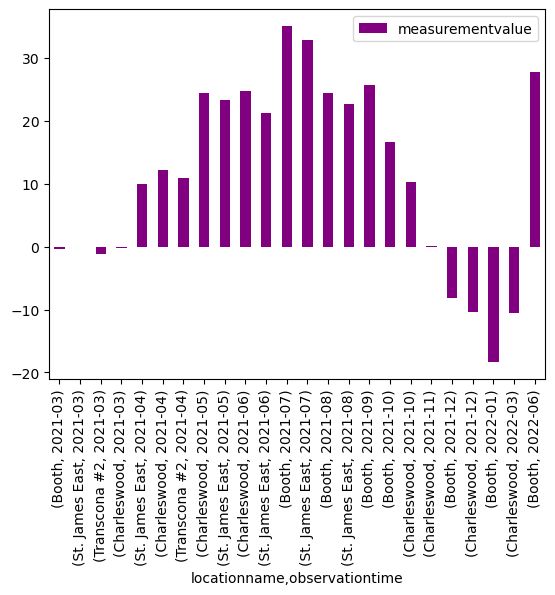

In [13]:
airquality_data_temperatures_clean_df = airquality_data_temperatures.groupby(
    ['locationname', 'observationtime']).mean().round(2)
airquality_data_temperatures_clean_df = airquality_data_temperatures_clean_df.sort_values(by='observationtime')
airquality_data_temperatures_clean_df.plot(kind='bar', color='purple')

plt.show()


In [14]:
print(airquality_data_temperatures.info())
airquality_data_temperatures.head()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 2021-06 to 2022-03
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locationname      256 non-null    object 
 1   measurementtype   256 non-null    object 
 2   measurementvalue  256 non-null    float64
 3   measurementunit   256 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.0+ KB
None


,locationname,measurementtype,measurementvalue,measurementunit
observationtime,,,,
2021-06,St. James East,Temperature,21.31,C
2021-06,Charleswood,Temperature,24.90,C
2021-06,St. James East,Temperature,21.16,C
2021-06,Charleswood,Temperature,24.84,C
2021-06,St. James East,Temperature,21.16,C


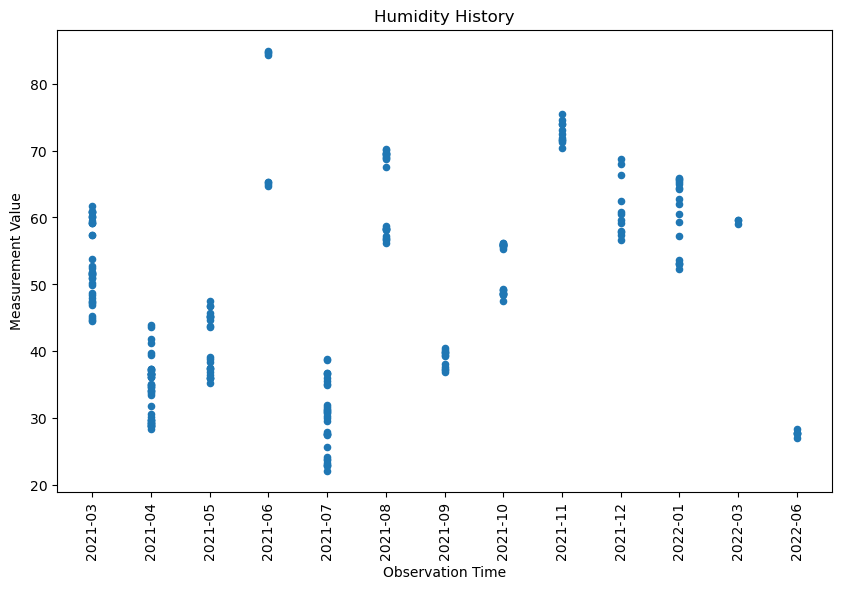

In [15]:
airquality_data_humidity = airquality_data[
    (airquality_data['measurementtype'] == 'Humidity') & (airquality_data['measurementvalue'] >= 0)].copy()
airquality_data_humidity['observationtime'] = pd.to_datetime(airquality_data_humidity['observationtime'])
airquality_data_humidity['observationtime'] = airquality_data_humidity['observationtime'].dt.strftime('%Y-%m')

airquality_data_humidity = airquality_data_humidity[['observationtime', 'measurementvalue']].sort_values(
    by='observationtime')
airquality_data_humidity.plot.scatter(x='observationtime', y='measurementvalue', figsize=(10, 6))
#airquality_data_humidity.plot.scatter(airquality_data_humidity['observationtime'],airquality_data_humidity['measurementvalue'],airquality_data_humidity['locationname'], figsize=(10, 6))
# Tried to color each dot by location. Gave up on it for the time being.
plt.xlabel('Observation Time')
plt.ylabel('Measurement Value')
plt.title('Humidity History')
plt.xticks(rotation=90)
plt.show()

We can see each date have groups of dots that are relatively close to eachother which which makes sense since this one coming from the same city, just different areas. But from time to time we can see gaps between the dots which could be because in that area there was more snow/rain or some other factor that could affect that.

It is interesting to see how it is different from month to month, and how different 2021-06 and 2022-06 which are totally opposite, while I expected something similar like 2021-03 and 2022-03. 

Data is beautiful.

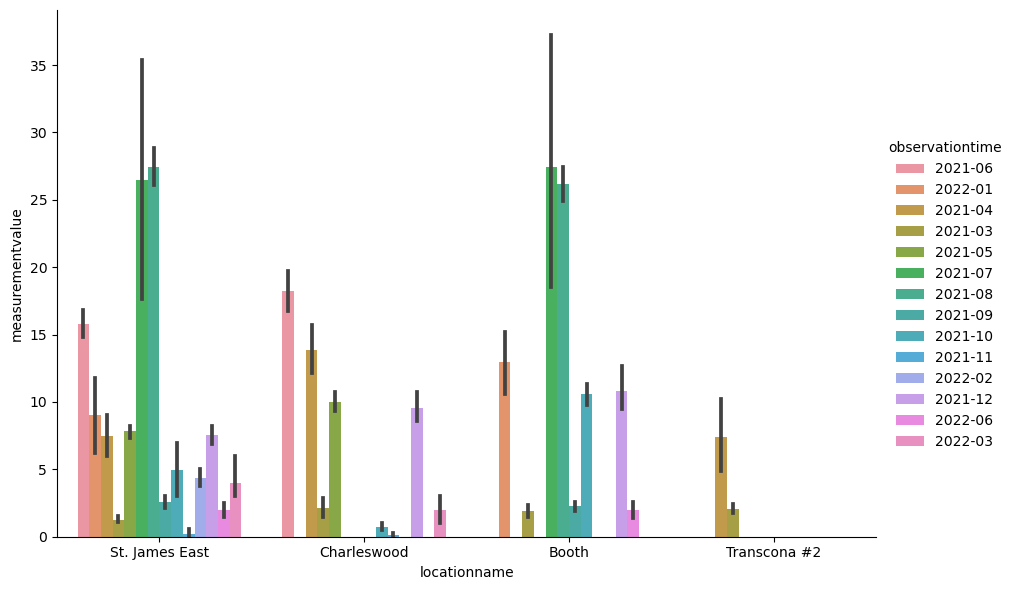

In [16]:
airquality_data_pmparticulates = airquality_data[
    (airquality_data['measurementtype'] == 'PM2.5 Particulates') & (airquality_data['measurementvalue'] >= 0)].copy()
airquality_data_pmparticulates['observationtime'] = pd.to_datetime(airquality_data_pmparticulates['observationtime'])
airquality_data_pmparticulates['observationtime'] = airquality_data_pmparticulates['observationtime'].dt.strftime(
    '%Y-%m')
airquality_data_pmparticulates.sort_values(by='observationtime')
airquality_data_pmparticulates = airquality_data_pmparticulates[['observationtime', 'locationname', 'measurementvalue']]

sns.catplot(data=airquality_data_pmparticulates, x='locationname', y='measurementvalue', hue='observationtime',
            kind='bar', height=6, aspect=1.5)

An analysis of air quality data from 2021-07 and 2021-08 indicates that the St. James East and Booth areas experienced poor air quality during this period. Potential causes for this phenomenon could include the occurrence of wildfires or the use of heaters in these areas, although further investigation is required to determine the exact cause. In contrast, the Charleswood and Transcona #2 areas exhibited relatively good air quality during this time frame. These locations may be suitable for individuals with health conditions that are sensitive to air quality.

# Parks and Open Space
Using data from [Parks and Open Space](https://data.winnipeg.ca/Parks/Parks-and-Open-Space/tx3d-pfxq)

In [17]:
parks_data = apackage.get_winnieg_parks_and_open_space_data()
print(parks_data.info())
print('Park categories: ', parks_data['park_category'].unique())
print('Park areas: ', parks_data['district'].unique())
parks_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   park_id                 1000 non-null   int64  
 1   park_name               1000 non-null   object 
 2   address                 0 non-null      float64
 3   location_description    1000 non-null   object 
 4   park_category           1000 non-null   object 
 5   linear_park_system      164 non-null    object 
 6   district                1000 non-null   object 
 7   neighbourhood           1000 non-null   object 
 8   electoral_ward          1000 non-null   object 
 9   cca                     1000 non-null   object 
 10  area_in_hectares        1000 non-null   float64
 11  water_area_in_hectares  1000 non-null   float64
 12  land_area_in_hectares   1000 non-null   float64
 13  location                1000 non-null   object 
 14  polygon                 1000 non-null   o

,park_id,park_name,address,location_description,park_category,linear_park_system,district,neighbourhood,electoral_ward,cca,area_in_hectares,water_area_in_hectares,land_area_in_hectares,location,polygon
0,10,North Kildonan Parkway,NaN,"W side of Henderson, N of Chief Peguis Trail",Park and Open Space,Kildonan Parkway,East,VALHALLA,North Kildonan,River East,4.288958,0.124168,4.164790,"\n, \n(49.95374080336401, -97.07975522576083)",MULTIPOLYGON (((-97.081624123766 49.9520756314...
1,1001,Dickson Crescent Park,NaN,23 Dickson Cres,Park and Open Space,NaN,South,MAYBANK,River Heights - Fort Garry,Fort Garry,0.116306,0.000000,0.116306,"\n, \n(49.83736109966284, -97.16228174173139)",MULTIPOLYGON (((-97.161990856367 49.8373496811...
2,700,Crestwood Park,NaN,Between Crestwood Cr & Conifer Cr,Park and Open Space,NaN,East,WINDSOR PARK,St. Boniface,St. Boniface,0.219155,0.000000,0.219155,"\n, \n(49.85749096208924, -97.08302850804466)",MULTIPOLYGON (((-97.083208519816 49.8570806518...
3,1,Champlain C.C,NaN,282 Niverville Ave,Park and Open Space,NaN,East,NORWOOD EAST,St. Boniface,St. Boniface,1.534225,0.000000,1.534225,"\n, \n(49.876025652254526, -97.1142843482076)",MULTIPOLYGON (((-97.114800234752 49.8752040118...
4,1004,Beaumont Bay Park,NaN,21 Beaumont Bay,Park and Open Space,NaN,South,MAYBANK,River Heights - Fort Garry,Fort Garry,0.115862,0.000000,0.115862,"\n, \n(49.839423691114035, -97.15620401975525)",MULTIPOLYGON (((-97.156311048623 49.8392369285...


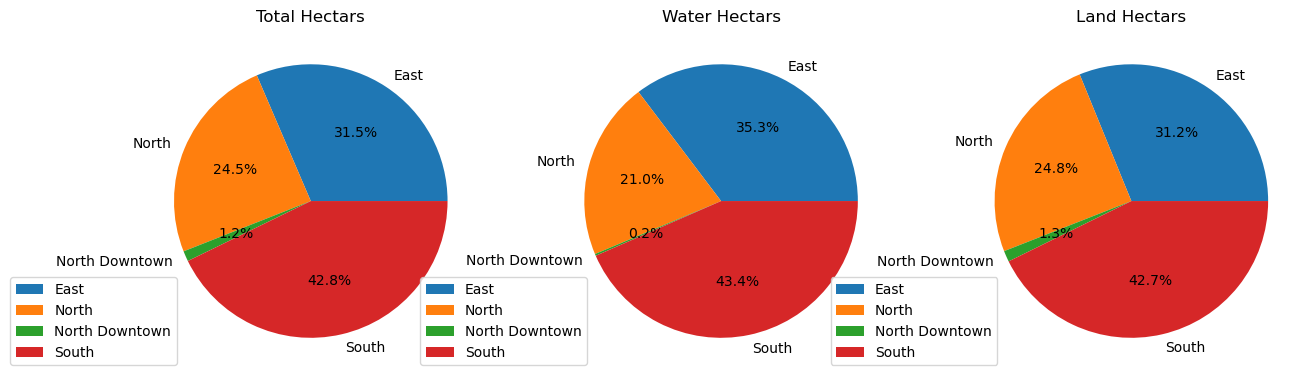

In [18]:
parks_data = parks_data[['district', 'area_in_hectares', 'water_area_in_hectares', 'land_area_in_hectares']]
parks_data_summed = parks_data.groupby('district')[
    ['area_in_hectares', 'water_area_in_hectares', 'land_area_in_hectares']].sum()
parks_data_summed.sort_values(by='area_in_hectares', ascending=False)
#parks_data_summed.plot.pie(autopct='%1.1f%%', subplots=True)
# The pies were too small and unreadable.

fig, axes = plt.subplots(1, 3, figsize=(15, 15))
parks_data_summed.plot.pie(y='area_in_hectares', ax=axes[0], autopct='%1.1f%%').set_title('Total Hectars')
parks_data_summed.plot.pie(y='water_area_in_hectares', ax=axes[1], autopct='%1.1f%%').set_title('Water Hectars')
parks_data_summed.plot.pie(y='land_area_in_hectares', ax=axes[2], autopct='%1.1f%%').set_title('Land Hectars')

# Removing ylabels
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

# Moving the legend off the pies
axes[0].legend(loc='lower left', bbox_to_anchor=(-0.4, 0))
axes[1].legend(loc='lower left', bbox_to_anchor=(-0.4, 0))
axes[2].legend(loc='lower left', bbox_to_anchor=(-0.4, 0))

According to the statistics, the South district has the highest amount of parks and open areas in Winnipeg in terms of total hectares, water hectares, and land hectares. The East district comes in second place, followed by the North and North Downtown districts.

In [19]:
parks_data_summed = parks_data_summed.rename(columns=
                                             {'area_in_hectares': 'Total Area',
                                              'water_area_in_hectares': 'Total Water Area',
                                              'land_area_in_hectares': 'Total Land Area'})

parks_data_summed

,Total Area,Total Water Area,Total Land Area
district,,,
East,834.306543,64.524484,769.782059
North,650.914431,38.392799,612.521632
North Downtown,32.560558,0.406166,32.154392
South,1134.564014,79.380824,1055.183190


The precise figures reveal the immense scale of park and open spaces in Winnipeg’s East, North, South and North Downtown areas.